# グラフ探索
- 深さ優先
- 幅優先

In [3]:
from graphviz import Digraph

In [72]:
class MyGraph:
    def __init__(self, graph_array):
        """
        graph_array : array
            二次元配列。graph_array[i][j] > 0 <=> ノードiからノードjへのエッジが存在
        """
        self.graph = graph_array
        self.size = len(graph_array)
        if self.size != len(graph_array[0]):
            raise Exception('入力配列の縦横サイズが異なります')

    def depth_first_search(self, i_init):
        """
        グラフを深さ優先探索
        """
        visited_nodes = [i_init]
        edges = [(i_init, i) for i in range(self.size) if self.graph[i_init][i] > 0]
        result = []
        while len(edges) > 0:
            i_from, i_to = edges.pop(0)
            if i_to not in visited_nodes:
                visited_nodes.append(i_to)
                result.append('{}->{}'.format(i_from, i_to))
                edges = [(i_to, i) for i in range(self.size) if self.graph[i_to][i] > 0] + edges
        return result

    def breadth_first_search(self, i_init):
        """
        グラフを幅優先探索
        """
        visited_nodes = [i_init]
        edges = [(i_init, i) for i in range(self.size) if self.graph[i_init][i] > 0]
        result = []
        while len(edges) > 0:
            i_from, i_to = edges.pop(0)
            if i_to not in visited_nodes:
                visited_nodes.append(i_to)
                result.append('{}->{}'.format(i_from, i_to))
                edges = edges + [(i_to, i) for i in range(self.size) if self.graph[i_to][i] > 0]
        return result

    def draw_graph(self):
        dot = Digraph()
        dot.attr('node', shape='circle')
        for i in range(self.size):
            dot.node(str(i), str(i))
            for j in range(self.size):
                if self.graph[i][j] > 0:
                    dot.edge(str(i), str(j))
        return dot

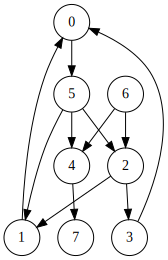

In [76]:
graph_array_directed = [
    [0,0,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,0],
    [0,1,0,1,0,0,0,0],
    [1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1],
    [0,1,1,0,1,0,0,0],
    [0,0,1,0,1,0,0,0],
    [0,0,0,0,0,0,0,0]
]
graph = MyGraph(graph_array_directed)
graph.draw_graph()

In [77]:
for i in range(graph.size):
    print('start={}, path={}'.format(i, graph.depth_first_search(i)))

start=0, path=['0->5', '5->1', '5->2', '2->3', '5->4', '4->7']
start=1, path=['1->0', '0->5', '5->2', '2->3', '5->4', '4->7']
start=2, path=['2->1', '1->0', '0->5', '5->4', '4->7', '2->3']
start=3, path=['3->0', '0->5', '5->1', '5->2', '5->4', '4->7']
start=4, path=['4->7']
start=5, path=['5->1', '1->0', '5->2', '2->3', '5->4', '4->7']
start=6, path=['6->2', '2->1', '1->0', '0->5', '5->4', '4->7', '2->3']
start=7, path=[]


In [78]:
for i in range(graph.size):
    print('start={}, path={}'.format(i, graph.breadth_first_search(i)))

start=0, path=['0->5', '5->1', '5->2', '5->4', '2->3', '4->7']
start=1, path=['1->0', '0->5', '5->2', '5->4', '2->3', '4->7']
start=2, path=['2->1', '2->3', '1->0', '0->5', '5->4', '4->7']
start=3, path=['3->0', '0->5', '5->1', '5->2', '5->4', '4->7']
start=4, path=['4->7']
start=5, path=['5->1', '5->2', '5->4', '1->0', '2->3', '4->7']
start=6, path=['6->2', '6->4', '2->1', '2->3', '4->7', '1->0', '0->5']
start=7, path=[]
